In [2]:
import os
import pandas as pd
import numpy as np

In [53]:
os.chdir("../../tests/geneticdata")
files = os.listdir()
for i, f in enumerate(files):
    print(i, f)

0 GeneticData_-_3.txt
1 GeneticData_-_2.txt
2 GeneticData_-_1.txt
3 GeneticData_-_5.txt
4 GeneticData_-_4.txt
5 GeneticData_-_6.txt
6 GeneticData_-_7.txt
7 rename_files.py
8 GeneticData_-_9.txt
9 GeneticData_-_8.txt


In [145]:
input_file = files[4]
chromo_name = "mtDNA"
output_file = "output_file.tsv"

with open(input_file, "rb") as f:
    i = 0
    chromo_line = None
    data_list = []
    while True:
        line_b = f.readline()
        line = str(line_b)
        if chromo_name in line:
            chromo_line = i + 1
        if i == chromo_line:
            data_list.append(line[2:line.find("\\")])
        i += 1
        if not line_b:
            break

data = np.array(data_list)

seq_lens = []
for seq in data:
    seq_lens.append(len(seq))
    
if len(np.unique(seq_lens)) > 1:
    # TODO: throw error
    pass
else:
    positions = seq_lens[0]

with open(output_file, "w") as f:
    f.write("\t".join(output_header) + "\n")
    
for p in range(positions):
    nucleotides = []
    for seq in data:
        if seq[p].upper() in "ACGT":
            nucleotides.append(seq[p].upper())
    if nucleotides.count(nucleotides[0]) < len(nucleotides):
        alleles = set(nucleotides)
        freqs = {}
        for a in alleles:
            freqs[a] = nucleotides.count(a)
        ma = max(freqs, key=freqs.get)
        mi = min(freqs, key=freqs.get)
        maf = freqs[mi] / sum(freqs[a] for a in alleles)
        row = "\t".join([chromo_name, str(p), "/".join(alleles), str(ma), str(mi), str(round(maf, 2))]) + "\n"
        with open(output_file, "a") as f:
            f.write(row)

In [15]:
x = [1, 1, 1, 2]
x = set(x)
print(len(x))

2


In [36]:
x = "A/AaaaaaA/Aa"
i = len(x) - x[::-1].find("/")
print(x[i:])
print(os.getcwd())

Aa
/Users/otodreas/Lund/Courses/MiscExercisesBINP16/RunningExercise3_BINP16/src/partiiiprograms


In [15]:
x = {'A': 10, 'B': 3, 'C': 3}
ma = max(x, key=x.get)
mi = min(x, key=x.get)
print(ma, mi)
print(list(x.values()).count(min(x.values())))
#for val in [ma, mi]:
    #key = x.get(val)
 #   print(key)

A B
2


In [17]:
x = {'A': 10, 'B': 3, 'C': 3}
ma = max(x, key=x.get)
mi = min(x, key=x.get)

import random

ma = []
mi = []
for item in x.items():
    if item[1] == min(list(x.values())):
        mi.append(item[0])
    elif item[1] == max(list(x.values())):
        ma.append(item[0])
ma = random.choice(ma)
mi = random.choice(mi)

('A', 10)
('B', 3)
('C', 3)


In [26]:
random.seed(0)
print(type(random.choice(['B'])))

<class 'str'>


In [36]:
x = ['a', 'b', 'c']
popper = 'd'
x.pop(x.index(popper)) if popper in x else x
print(x)

['a', 'b', 'c']


## dendogram

link to dendogram script below: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

simpler examples: https://www.geeksforgeeks.org/python/scipy-cluster-hierarchy-dendrogram/

In [169]:
i = 1
for _ in range(5):
    i *= 2
    print(i)

2
4
8
16
32


In [184]:
import numpy as np
import pandas as pd

np.random.seed(0)
d = np.eye(4)

scaler = 1
for i, row in enumerate(d):
    for j, col in enumerate(row):
        if i < j:
            scaler *= 1.5
            d[i][j] = abs(np.random.normal(loc=d[i][j], scale=0.5*scaler))
        else:
            d[i][j] = d[j][i]
d

array([[1.        , 1.32303926, 0.45017686, 1.65162035],
       [1.32303926, 1.        , 5.67226091, 7.09088424],
       [0.45017686, 5.67226091, 1.        , 5.56590293],
       [1.65162035, 7.09088424, 5.56590293, 1.        ]])

In [17]:
# Load the Iris dataset
iris = load_iris()

# Access the features and target variable
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target variable (species: 0 for setosa, 1 for versicolor, 2 for virginica)

# Print the feature names and target names
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

# Print the first few samples in the dataset
print("First 5 samples:")
for i in range(5):
    print(f"Sample {i+1}: {X[i]} (Class: {y[i]}, Species: {iris.target_names[y[i]]})")
help(iris)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
First 5 samples:
Sample 1: [5.1 3.5 1.4 0.2] (Class: 0, Species: setosa)
Sample 2: [4.9 3.  1.4 0.2] (Class: 0, Species: setosa)
Sample 3: [4.7 3.2 1.3 0.2] (Class: 0, Species: setosa)
Sample 4: [4.6 3.1 1.5 0.2] (Class: 0, Species: setosa)
Sample 5: [5.  3.6 1.4 0.2] (Class: 0, Species: setosa)
Help on Bunch in module sklearn.utils._bunch object:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |
 |  Container object exposing keys as attributes.
 |
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c 

In [ ]:
# exact copy of code from link
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Define a set of objects
objects = np.array([[1, 10], [2, 11], [3, 4]])

# Calculate the pairwise distances
distances = pdist(objects)

# Convert the distances to a square matrix
distance_matrix = squareform(distances)


# Perform hierarchical clustering
Z = linkage(distance_matrix)

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

# solution dendrogram:
- import libraries
```python
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
```
- take distance matrix with the shape
```markdown
  A  B  C
[[1, 0, 0], A
 [0, 1, 0], B
 [0, 0, 1]] C
```
where the row `A B C` are `labels`
- assign the linkage matrix of the distance matrix to `Z`
```python
Z = linkage(data)
```
- draw figure and plot the dendrogram with the labels from the distance matrix
```python
plt.figure()
dendrogram(Z, labels=labels)
plt.show()
```

[[1.         1.32303926 0.45017686 1.65162035]
 [1.32303926 1.         5.67226091 7.09088424]
 [0.45017686 5.67226091 1.         5.56590293]
 [1.65162035 7.09088424 5.56590293 1.        ]]


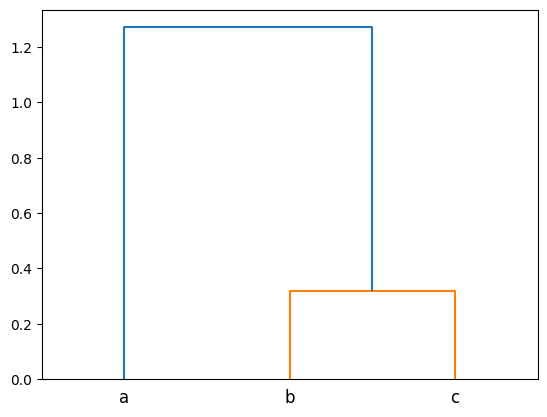

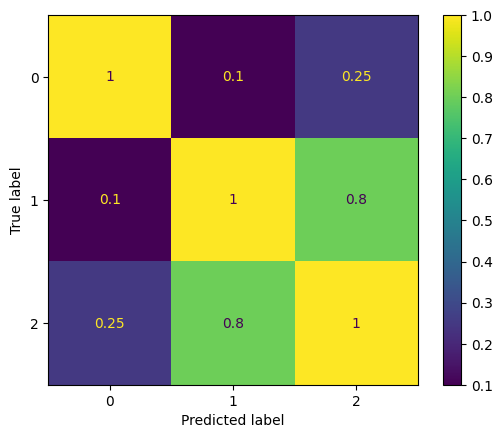

In [199]:
print(d)
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import metrics
import matplotlib.pyplot as plt
data = np.array([
    #0  1     2
    [1, 0.1, .25], # 0
    [0.1, 1, .8],  # 1
    [.25, .8, 1]   # 2
])
Z = linkage(data)
plt.figure()
dendrogram(Z, labels=np.array(['a', 'b', 'c']))
plt.show()

ConfusionMatrixDisplay(data).plot()#, display_labels = labels)
plt.show()

[[12  1]
 [ 2 10]]


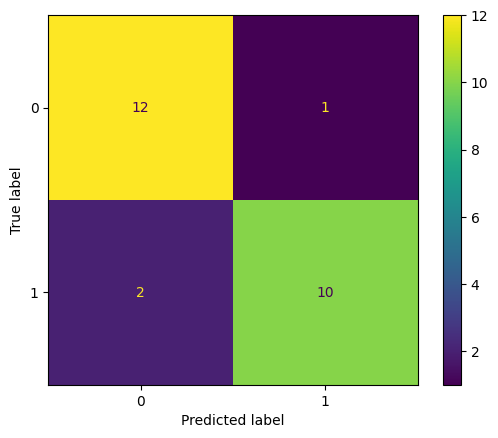

In [193]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [30]:
import sys
import numpy as np
def DistanceMatrixPlotter(matrix: np.array):
    if type(matrix) != type(np.array([])):
        print("Error: please input a numpy array")
    n_dims = len(matrix.shape)
    if n_dims != 2:
        print("Error: the numpy array does not have 2 dimensions")
DistanceMatrixPlotter([1])

<class 'numpy.ndarray'>


'Error: please input a numpy array'

In [84]:
def tsv_array_converter(filepath):
    data = []
    with open(filepath, "r") as f:
        while True:
            line = f.readline()
            row = line.strip("\n").split("\t")
            if line:
                data.append(row)
            else:
                break

    labels = np.array(data[0][1:])
    data_dims = len(data) - 1
    data_array = np.zeros((data_dims, data_dims))
    for i in range(data_dims):
        for j in range(data_dims):
            try:
                data_array[i][j] = data[i+1][j+1]
            except ValueError:
                data_array[i][j] = 100.
    
    return data_array, labels

l, d = tsv_array_converter(os.path.join(os.getcwd(), "Generate_genetic_distance/mtDNA_genetic_distance.tsv"))
print(l)
print(d)

[[100.           0.35820434  15.32668782   1.16810863   0.73789204
    4.00435452   0.52346905   0.58894685   0.82395922   1.16810863
    1.33309662   0.92119912   0.73789204   1.16810863   1.16810863
   15.32668782]
 [  0.35820434 100.          15.32668782   1.33309662   0.52346905
    1.8319603    0.82395922   0.92119912   0.92119912   1.33309662
    1.03612938   1.53867525   0.82395922   1.16810863   0.92119912
   15.32668782]
 [ 15.32668782  15.32668782 100.          15.32668782  15.32668782
   15.32668782  15.32668782  15.32668782  15.32668782  15.32668782
   15.32668782  15.32668782  15.32668782  15.32668782  15.32668782
   15.32668782]
 [  1.16810863   1.33309662  15.32668782 100.           1.8319603
   15.32668782   1.8319603   15.32668782   2.30284186   1.8319603
   15.32668782   2.30284186   1.53867525  15.32668782  15.32668782
   15.32668782]
 [  0.73789204   0.52346905  15.32668782   1.8319603  100.
    1.8319603    1.8319603    1.33309662   1.53867525   1.53867525
    1.33

<generator object <genexpr> at 0x1190d4880>
